<a href="https://colab.research.google.com/github/rudrajoshi2481/Bioinformatics-Practices/blob/main/pyNotebooks/Day01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESOL : Estimating Aqueous Solublity Directly from Molecular Structure**
Author : John S. Delaney

Research paper: https://pubs.acs.org/doi/10.1021/ci034243x 


## **Abstract ❤**

To predict the solublity (logP) (octanol/water partion coefficient) of the compound by 4 parameters.Ny using Linear Regression 

***Parameters 🍕***

* Molecular Weight
* propotion of Heavy Atoms in Aromatic Systems
* Number of rotatable bonds



# Fetched dataset from that article the link was not working so i created a github file 😎

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-12-02 09:28:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   308MB/s    in 0.3s    

2022-12-02 09:28:13 (308 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [3]:
! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt

--2022-12-02 09:29:07--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Resolving pubs.acs.org (pubs.acs.org)... 104.18.3.147, 104.18.2.147
Connecting to pubs.acs.org (pubs.acs.org)|104.18.3.147|:443... connected.
HTTP request sent, awaiting response... 503 Service Temporarily Unavailable
2022-12-02 09:29:07 ERROR 503: Service Temporarily Unavailable.



In [4]:
! wget https://raw.githubusercontent.com/rudrajoshi2481/Bioinformatics-Practices/main/pyNotebooks/Day01.csv

--2022-12-02 09:29:07--  https://raw.githubusercontent.com/rudrajoshi2481/Bioinformatics-Practices/main/pyNotebooks/Day01.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘Day01.csv’

Day01.csv           100%[===================>]  57.51K  --.-KB/s    in 0.004s  

2022-12-02 09:29:07 (15.5 MB/s) - ‘Day01.csv’ saved [58889/58889]



In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("./Day01.csv")
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


### **Convert a molecule from SMILES to rdkit object**

In [7]:
from rdkit import Chem

In [8]:
df.SMILES[0]

'ClCC(Cl)(Cl)Cl'

In [9]:
mol_list = []

for molecule in df.SMILES:
  mol = Chem.MolFromSmiles(molecule)
  mol_list.append(mol)

mol_list

 ...]

In [10]:
len(mol_list)

1144

### **Method 02**

In [11]:
mol_list = [Chem.MolFromSmiles(molecule) for molecules in df.SMILES]
len(mol_list)

1144

## **Calculate tha parameters *Descriptor* .**

1. clogP : octanol water partion coefficient
2. MW    : Molecular Weight
3. Rb    : Rotatable Bonds
4. Ap    : Aromatic Propotions

In [12]:
import numpy as np
from rdkit.Chem import Descriptors

# **Self practice of rdkit**

In [20]:
m = df.SMILES[100]
m = Chem.MolFromSmiles(m)


In [15]:
from rdkit.Chem import Draw

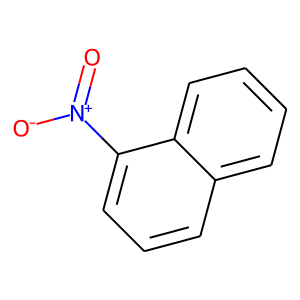

In [22]:
Draw.MolToImage(m)

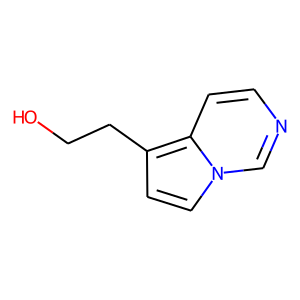

In [26]:
i = Chem.MolFromSmiles("OCCc1ccn2cnccc12")
Draw.MolToImage(i)

In [30]:
# draw molecule to gide image


In [31]:
mol_list[:10]

In [40]:
# [Draw.MolToImage(i) for i in mol_list]

from rdkit.Chem import AllChem


In [48]:


Draw.MolsToGridImage(AllChem.Compute2DCoords(mol_list[0]),molsPerRow=5)

TypeError: ignored

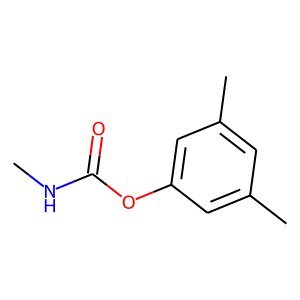

In [54]:
Draw.MolToImage(mol_list[0])

In [64]:
mol_list

 ...]

In [85]:
img = Draw.MolsToGridImage(mol_list[:5],molsPerRow=3,subImgSize=(250,250))

In [88]:
img.save("johsi.png",format="png")

In [84]:
# practicing pandas

df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [123]:
compoundName = df.iloc[:,0].values
compoundName

array(['1,1,1,2-Tetrachloroethane', '1,1,1-Trichloroethane',
       '1,1,2,2-Tetrachloroethane', ..., 'Warfarin', 'Xipamide', 'XMC'],
      dtype=object)

In [120]:
compoundSMILES = df.iloc[:,-1].values
compoundSMILES

array(['ClCC(Cl)(Cl)Cl', 'CC(Cl)(Cl)Cl', 'ClC(Cl)C(Cl)Cl', ...,
       'CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O ',
       'Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O',
       'CNC(=O)Oc1cc(C)cc(C)c1'], dtype=object)

In [121]:
mol_list = [Chem.MolFromSmiles(i) for i in compoundSMILES]

In [122]:
len(mol_list)

1144

In [127]:
#  draw 100 mol in Grid with their compound name

Draw.MolsToGridImage(mol_list[:100],molsPerRow=2,subImgSize=(400,400),legends="somethibg")


RuntimeError: ignored

[None]

## Dope Shit

In [128]:
smi = 'c1cc(F)ccc1Cl'

In [129]:
mol =  Chem.MolFromSmiles(smi)

In [130]:
patt = Chem.MolFromSmarts('c1cc')

In [132]:

!wget http://vina.scripps.edu/download/autodock_vina_1_1_2_linux_x86.tgz

URL transformed to HTTPS due to an HSTS policy
--2022-12-02 11:23:14--  https://vina.scripps.edu/download/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-02 11:23:17 ERROR 404: Not Found.



In [133]:
!wget https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz

--2022-12-02 11:23:20--  https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238242 (1.2M) [application/x-gzip]
Saving to: ‘autodock_vina_1_1_2_linux_x86.tgz’

autodock_vina_1_1_2 100%[===================>]   1.18M  1.27MB/s    in 0.9s    

2022-12-02 11:23:22 (1.27 MB/s) - ‘autodock_vina_1_1_2_linux_x86.tgz’ saved [1238242/1238242]



In [134]:
!tar xzvf autodock_vina_1_1_2_linux_x86.tgz


autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split


In [137]:
! ./autodock/bin/vina 

Missing receptor.

Correct usage:

Input:
  --receptor arg        rigid part of the receptor (PDBQT)
  --flex arg            flexible side chains, if any (PDBQT)
  --ligand arg          ligand (PDBQT)

Search space (required):
  --center_x arg        X coordinate of the center
  --center_y arg        Y coordinate of the center
  --center_z arg        Z coordinate of the center
  --size_x arg          size in the X dimension (Angstroms)
  --size_y arg          size in the Y dimension (Angstroms)
  --size_z arg          size in the Z dimension (Angstroms)

Output (optional):
  --out arg             output models (PDBQT), the default is chosen based on 
                        the ligand file name
  --log arg             optionally, write log file

Misc (optional):
  --cpu arg                 the number of CPUs to use (the default is to try to
                            detect the number of CPUs or, failing that, use 1)
  --seed arg                explicit random seed
  --exhaustiveness 

In [144]:
!alias vina /content/autodock/bin/vina

/bin/bash: line 0: alias: vina: not found
/bin/bash: line 0: alias: /content/autodock/bin/vina: not found


In [142]:
!pwd

/content
